In [1]:
import numpy as np

num_rows = 4
num_cols = 4
num_states = num_rows * num_cols  # 4x4 grid
num_actions = 4  # Up, Down, Left, Right
num_episodes = 1000
alpha = 0.6  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy

In [2]:
# Initialize Q-values for SARSA and Q-learning
Q_sarsa = np.zeros((num_states, num_actions), dtype=float)
Q_qlearning = np.zeros((num_states, num_actions), dtype=float)

# Define rewards for each state
rewards = np.random.randint(1, 10, num_states)

# Define the goal state and obstacles
goal_state = num_states - 1
obstacles = [5, 7, 10]

# Update rewards for goal state and obstacles
rewards[goal_state] = 10
for obstacle in obstacles:
    rewards[obstacle] = -10

In [3]:

def epsilon_greedy_policy(state, Q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, num_actions)
    else:
        return np.argmax(Q_values[state])

def sarsa(num_states, num_actions, num_episodes, alpha, gamma, epsilon):
    for episode in range(num_episodes):
        state = np.random.randint(0, num_states)
        action = epsilon_greedy_policy(state, Q_sarsa, epsilon)

        while True:
            next_state = (state + action) % num_states
            next_action = epsilon_greedy_policy(next_state, Q_sarsa, epsilon)

            reward = rewards[next_state]

            Q_sarsa[state, action] = (1 - alpha) * Q_sarsa[state, action] + \
                                      alpha * (reward + gamma * Q_sarsa[next_state, next_action])

            state = next_state
            action = next_action

            if state == num_states - 1:
                break

    return Q_sarsa

def q_learning(num_states, num_actions, num_episodes, alpha, gamma, epsilon):
    for episode in range(num_episodes):
        state = np.random.randint(0, num_states)

        while True:
            action = epsilon_greedy_policy(state, Q_qlearning, epsilon)

            next_state = (state + action) % num_states

            reward = rewards[next_state]

            Q_qlearning[state, action] = (1 - alpha) * Q_qlearning[state, action] + \
                                          alpha * (reward + gamma * np.max(Q_qlearning[next_state, :]))

            state = next_state

            if state == num_states - 1:
                break

    return Q_qlearning

In [4]:
learned_Q_values_sarsa = sarsa(num_states, num_actions, num_episodes, alpha, gamma, epsilon)
learned_Q_values_qlearning = q_learning(num_states, num_actions, num_episodes, alpha, gamma, epsilon)

print("Learned Q-values (SARSA):")
print(learned_Q_values_sarsa)
print("\nLearned Q-values (Q-learning):")
print(learned_Q_values_qlearning)

final_policy_sarsa = np.argmax(learned_Q_values_sarsa, axis=1)
final_policy_qlearning = np.argmax(learned_Q_values_qlearning, axis=1)

print("\nFinal Policy (SARSA):")
print(final_policy_sarsa)
print("\nFinal Policy (Q-learning):")
print(final_policy_qlearning)

Learned Q-values (SARSA):
[[54.42142128 55.06119396 56.75490549 56.87139762]
 [52.90366432 57.06915499 59.19421384 46.91883665]
 [47.46607121 58.9149006  43.59891928 40.18218301]
 [47.74709207 56.95186898 44.29555797 51.85307342]
 [49.07403549 45.20336146 55.72672011 41.5389062 ]
 [42.61495981 56.03420662 41.15230121 54.2535381 ]
 [49.45825967 41.66795569 54.66920575 46.86418535]
 [39.43105308 55.88452496 48.3999337  37.99631793]
 [47.40390326 49.8714146  39.85628813 50.95375799]
 [43.13473547 38.23482222 50.53848857 39.05458419]
 [40.04532618 52.15449568 51.45401734 55.46855359]
 [52.10264408 55.09211195 57.97925338 49.72843111]
 [54.85096488 54.57670054 54.08504454 60.85481074]
 [46.15207206 51.36887118 62.71209341 52.83290343]
 [50.09891239 52.09971137 48.0198356  54.93280663]
 [ 6.         31.385475   60.68224211 43.27978035]]

Learned Q-values (Q-learning):
[[84.         84.         83.         90.        ]
 [83.99323558 82.26242627 90.         79.87679232]
 [82.99956675 90.      

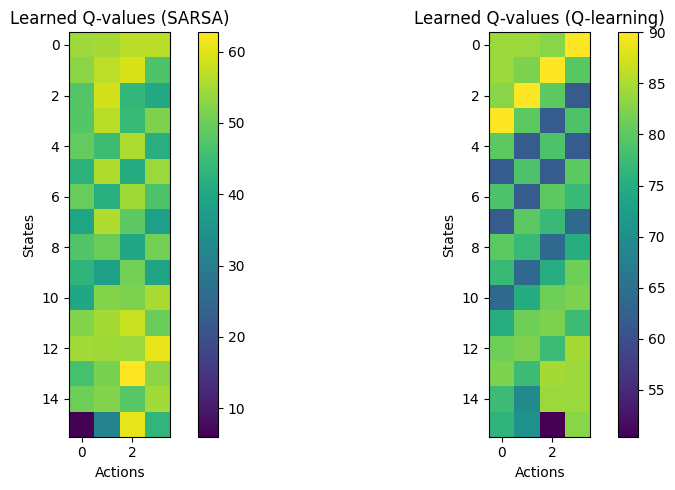

In [5]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(learned_Q_values_sarsa, cmap='viridis')
plt.colorbar()
plt.title('Learned Q-values (SARSA)')
plt.xlabel('Actions')
plt.ylabel('States')

plt.subplot(1, 2, 2)
plt.imshow(learned_Q_values_qlearning, cmap='viridis')
plt.colorbar()
plt.title('Learned Q-values (Q-learning)')
plt.xlabel('Actions')
plt.ylabel('States')

plt.tight_layout()
plt.show()

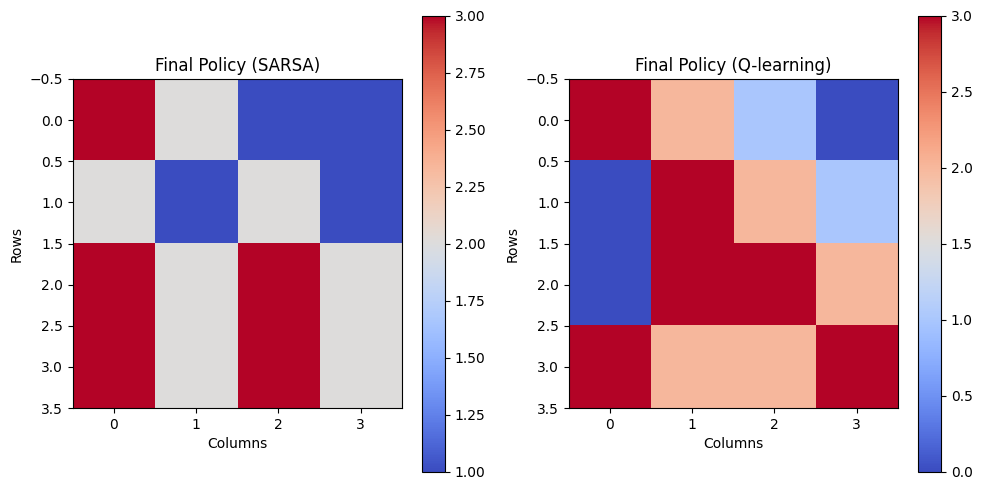

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(final_policy_sarsa.reshape(num_rows, num_cols), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Final Policy (SARSA)')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.subplot(1, 2, 2)
plt.imshow(final_policy_qlearning.reshape(num_rows, num_cols), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Final Policy (Q-learning)')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

combined_Q_values = np.concatenate((learned_Q_values_sarsa, learned_Q_values_qlearning), axis=0)

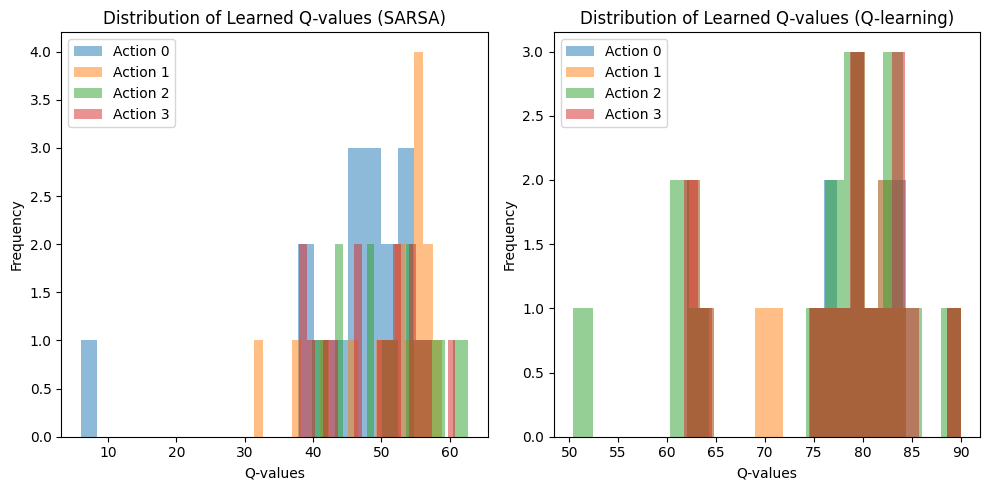

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for action in range(num_actions):
    plt.hist(learned_Q_values_sarsa[:, action], bins=20, alpha=0.5, label=f'Action {action}')
plt.xlabel('Q-values')
plt.ylabel('Frequency')
plt.title('Distribution of Learned Q-values (SARSA)')
plt.legend()

plt.subplot(1, 2, 2)
for action in range(num_actions):
    plt.hist(learned_Q_values_qlearning[:, action], bins=20, alpha=0.5, label=f'Action {action}')
plt.xlabel('Q-values')
plt.ylabel('Frequency')
plt.title('Distribution of Learned Q-values (Q-learning)')
plt.legend()

plt.tight_layout()
plt.show()